### Table of Contents in this notebook 

* [Chapter 1](#chapter1) 분석과 모델 구축을 위한 라이브러리 설치
    * [Section 1.1](#section_1_1) 라이브러리

* [Chapter 2] (#chapter2) EDA
    * [Section 2.1](#section_2_1) 데이터 로딩
    * [Section 2.2](#section_2_2) 결측치 처리 및 전처리
    * [Section 2.3](#section_2_3) 데이터 시각화
    * 
* [Chapter 3] (#chapter3) 상관분석
    * [Section 3.1](#section_3_1) 상관관계
    * [Section 3.2](#section_3_2) 데이터 시각화




### Chapter 1 <a class="anchor" id="chapter1"> 분석과 모델 구축을 위한 라이브러리 설치</a>



#### Section 1.1 <a class="anchor" id="section_1_1"> 라이브러리</a> 

In [115]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Chapter 2  <a class="anchor" id="chapter1">데이터 파악 및 전처리</a>



#### Section 2.1 <a class="anchor" id="section_1_1"> 데이터 파악</a> 

In [139]:
# gender_submission
p_survived = pd.read_csv('/Users/yenniy/project/assignment/data/gender_submission.csv')
p_survived

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [140]:
p_survived['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [141]:
p_survived['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

- 사망자는 266명(63.6%), 생존자는 152명(36.4%)으로 사망자의 비율이 높다는 것을 알 수 있다.

In [142]:
# test.csv, train.csv
test_df = pd.read_csv('/Users/yenniy/project/assignment/data/test.csv')
train_df = pd.read_csv('/Users/yenniy/project/assignment/data/train.csv')

In [143]:
# train.csv
test_df = pd.read_csv('/Users/yenniy/project/assignment/data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [146]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [147]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [148]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [149]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- train_df: Age, cabin에 대해 결측치 존재
- test_df: Age, Fare, cabin에 대해 결측치 존재

In [150]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Passengerid(승객): 총 891명
- Survive(생존 여부): 생존자 약 339명, 38% / 사망자 약 552명, 62%
- Pclass: 1등급부터 3등급
- Age: 승객의 714명에 대한 나이 정보이며 최소 0살 - 최대 80세로 평균적으로 30대로 구성
- SibSp: 전체적으로 형제, 자매와 탑승을 하지 않는 것으로 나타남
- Parch: 전체적으로 부모, 자녀와 탑승을 하지 않는 것으로 나타남
- Fare: 최소 0달러 - 최대 512달러이며 평균 운임비용은 32달러

In [151]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- Passengerid(승객): 총 418명
- Pclass: 1등급부터 3등급
- Age: 승객의 332명에 대한 나이 정보이며 최소 0살 - 최대 76세로 평균적으로 30대로 구성
- SibSp: 전체적으로 형제, 자매와 탑승을 하지 않는 것으로 나타남
- Parch: 전체적으로 부모, 자녀와 탑승을 하지 않는 것으로 나타남
- Fare: 최소 0달러 - 최대 512달러이며 평균 운임비용은 35달러

#### Section 2.2 <a class="anchor" id="section_1_1">전처리</a> 

<Axes: >

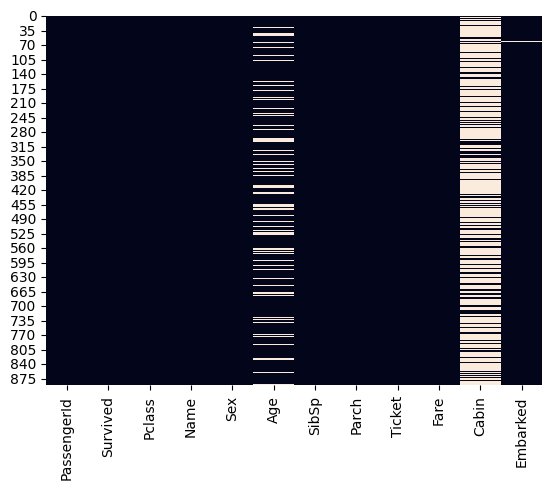

In [152]:
sns.heatmap(train_df.isnull(), cbar=False)

In [153]:
# train_df 결측치 제거
# age
age_mean = {
    'female': train_df[train_df['Sex'] == 'female']['Age'].mean(),
    'male': train_df[train_df['Sex'] == 'male']['Age'].mean()
}

train_df.loc[(train_df['Sex'] == 'female') & (train_df['Age'].isnull()), 'Age'] = age_mean['female']
train_df.loc[(train_df['Sex'] == 'male') & (train_df['Age'].isnull()), 'Age'] = age_mean['male']

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 나이에 대한 결측값은 각 성별에 대한 나이의 평균을 이용하여 결측치 채움

In [154]:
train_df['Embarked'].mode()
train_df['Embarked'].fillna('S', inplace=True)
train_df

/var/folders/hm/2tqd5v2d43bdw3tp719w8h_00000gn/T/ipykernel_6958/2380496045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna('S', inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


- Embarked는 범주형 변수로 최빈값을 통해 결측치 

In [155]:
# 불필요한 컬럼 제거
train_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [156]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#### Section 2.3 <a class="anchor" id="section_1_1">데이터 시각화</a> 

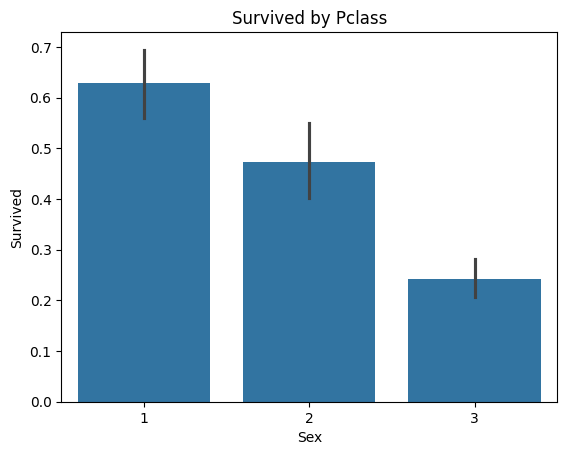

In [157]:
# 등급에 따른 생존여부 비교
sns.barplot(x='Pclass', y='Survived', data=train_df)

plt.title('Survived by Pclass')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

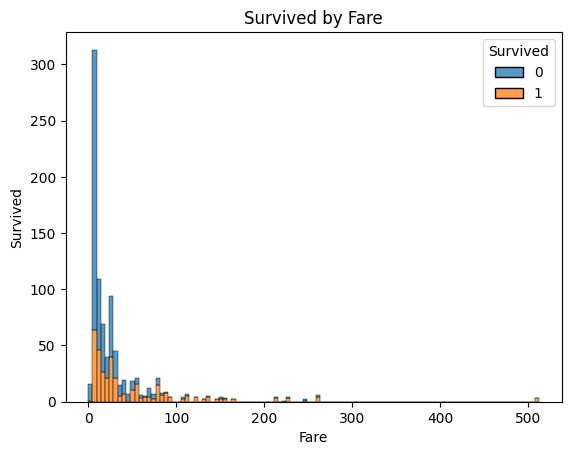

In [173]:
# 가격에 따른 생존여부
# 나이에 따른 생존여부
sns.histplot(x="Fare", hue="Survived", data=train_df, multiple='stack')
plt.title('Survived by Fare')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

- Pclass와 Fare에 대한 생존여부를 봤을 때 공통적으로 등급과 요금이 높을 경우, 사망자가 현저히 낮게 나타남.
- 이를 통해 사회적 계급 간에 발생한 불균형에 대한 문제를 파악할 수 있음

/var/folders/hm/2tqd5v2d43bdw3tp719w8h_00000gn/T/ipykernel_6958/4285687382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_df, palette={"male": "blue", "female": "red"})


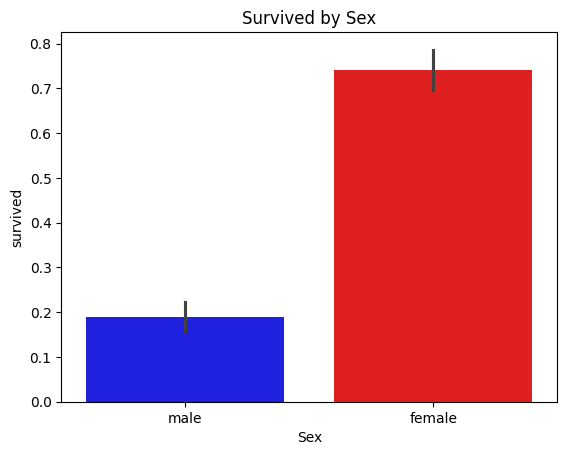

In [158]:
# 성별에 따른 생존여부
sns.barplot(x='Sex', y='Survived', data=train_df, palette={"male": "blue", "female": "red"})

plt.title('Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('survived')
plt.show()

- 성별에 따른 생존은 여성이 높다

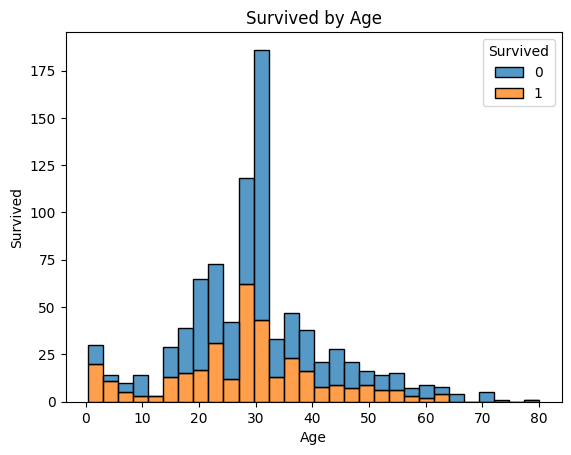

In [182]:
# 나이에 따른 생존여부
sns.histplot(x="Age", hue="Survived", data=train_df, multiple='stack')
plt.title('Survived by Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

- 10-20대에서 생존율이 높게 나타난다. 이는 나이가 어릴수록 우선적으로 구조가 되었거나 상대적으로 신체적으로 유리한 20대의 경우 자신의 보호할 수 있는 능력이 고령자보다는 높기에 생존율이 높게 나타난다.
- 30대에서 높은 사망자가 발생하는데 이는 구조 참여로 인해 발생했을 가능성이 높다.
- 중장년층부터는 신체적 능력이 떨어지기에 나이가 높아질수록 사망자비율이 증가하는 것을 볼 수 있다.


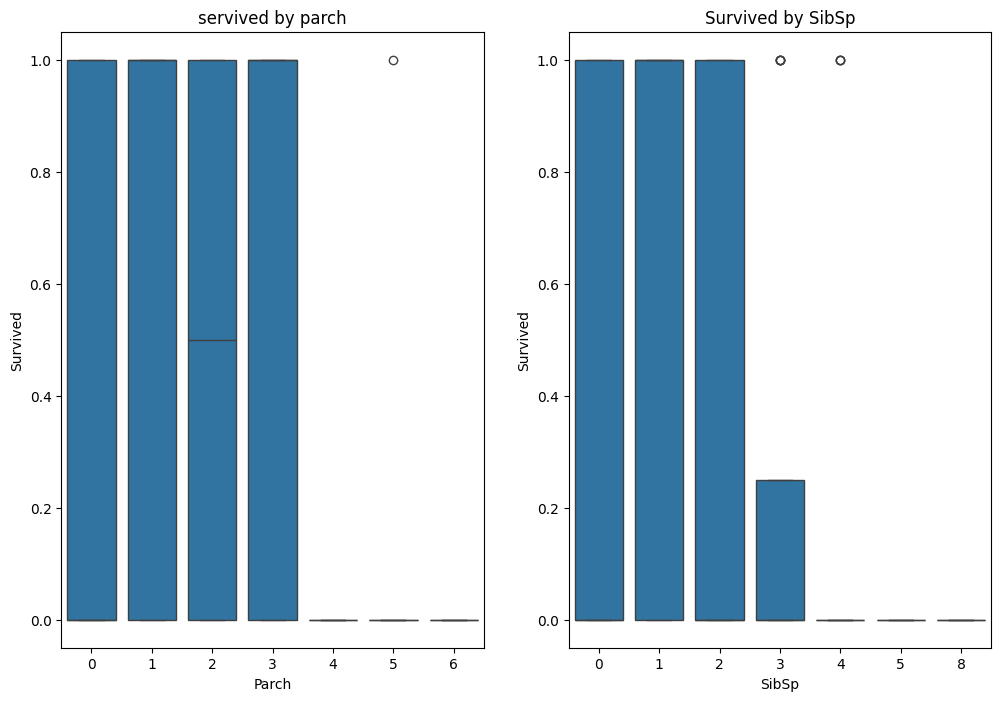

In [179]:
# 가족에 따른 생존 여부
fig, axes = plt.subplots(1, 2, figsize=(12,8))

# 부모
sns.boxplot(x='Parch', y='Survived', data=train_df, ax=axes[0])
axes[0].set_title('servived by parch')

# 형제자매
sns.boxplot(x='SibSp', y='Survived', data=train_df, ax=axes[1])
axes[1].set_title('Survived by SibSp')

# 레이아웃 조정
plt.show()


- 부모
: 부모와 자녀가 함께 승선을 하였을 경우 생존율이 높다. 이는 위험 상황에 대해 성인인 부모가 대처를 하며 구조에 적극적으로 활동하기에 생존율이 높게 나타난다. 또한 어린이와 여성이 있어 우선적으로 구조가 되었을 가능성이 크다.

- 형제자매
: 형제와 자매 수가 많을수록 생존율이 낮다. 이는 위험 상황에 대한 대처에 한계가 존재하며 한정된 구명보트로 인해 사망자 수가 높은 것을 볼 수 있다.

### Chapter 3  <a class="anchor" id="chapter1">상관분석</a>

#### Section 3.1 <a class="anchor" id="section_1_1">상관관계</a> 

In [168]:
# 상관계수
select_col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']
train_corr = train_df[select_col].corr()
train_corr

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.080453,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.330391,0.083081,-0.549500
Age,-0.080453,-0.330391,1.000000,-0.236920,0.089079
SibSp,-0.035322,0.083081,-0.236920,1.000000,0.159651
Fare,0.257307,-0.549500,0.089079,0.159651,1.000000


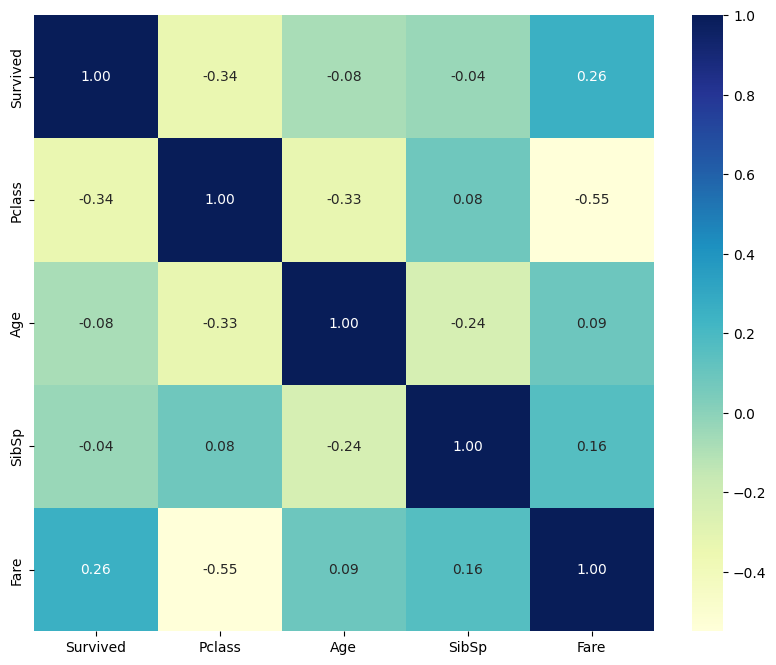

In [169]:
# 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(train_corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.show()

- Fare와 Survived 간에 양의 상관관계를 가진다. 이는 요금이 높을수록 생존율이 증가한다는 것을 의미한다.
- Pclass와 Survived 간에 음의 상관관계를 나타낸다. 1등석일 경우 생존 확률이 높지만 등급이 낮아질수록 사망자가 늘어난다.
- 히트맵을 통해 각 요소별로 상관관계를 파악할 수 있으며 특히 생존여부에 대해 각각의 요소들과 상관관계를 파악하여 분석을 할 수 있다.